In [ ]:
 key = 'f7f12a746bc25d73c4bb54fdf68750a40536da39'

In [ ]:
import pandas_datareader as pdr #For DataCollection

In [ ]:
df = pdr.get_data_tiingo('AAPL',api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd
df = pd.read_csv("AAPL.csv")

In [ ]:
df.tail()

In [ ]:
df2 = df.reset_index()['close']  #WE will be doing prediction for CLOSE coloumn and features will be previous close values

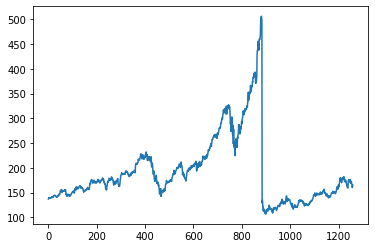

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [ ]:
### LSTM are very sensitive to the scale of the data .so we apply minmax scalar


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 =scalar.fit_transform(np.array(df2).reshape(-1,1))


In [ ]:
# Spliting the data
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data , test_data = df1[0:training_size],df1[training_size:len(df1)] #[start:End]

In [ ]:
print(training_size, test_size)

819 441


In [ ]:
def Create_dataset(dataset,timestep=1):
  DataX = []
  DataY = []
  for i in range(len(dataset)-timestep-1): #if i=1 ,timestep=100
    a = dataset[i:(i+timestep)]     # a/TrainX = [1: (1 + 100)] = value from  1->100
    DataX.append(a) 
    DataY.append(dataset[i+timestep]) #TrainY = [1 + 100] -> 101th value
  return np.array(DataX), np.array(DataY)


In [ ]:
time_step = 100
X_train , Y_train = Create_dataset(train_data,time_step)
X_test , y_test = Create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape,Y_train.shape)

(718, 100, 1) (718, 1)


## Creating LTSM


In [ ]:
#We have to give 3 dimensional model in lstm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 203ms/step - loss: 0.0210 - val_loss: 0.0023
Epoch 2/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 3/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0017 - val_loss: 8.8775e-04
Epoch 4/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0012 - val_loss: 2.7191e-04
Epoch 5/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0011 - val_loss: 2.4924e-04
Epoch 6/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0010 - val_loss: 2.5331e-04
Epoch 7/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0010 - val_loss: 3.2875e-04
Epoch 8/100
12/12 [==============================] - 1s 83ms/step - loss: 9.1802e-04 - val_loss: 2.3938e-04
Epoch 9/100
12/12 [==============================] - 1s 84ms/step - loss: 9.2500e-04 - val_loss: 2.5600e-04
Epoch 10/100
12/12 [==============================] - 1s 84ms/

In [ ]:
test_predict=model.predict(X_test)
test_predict=scalar.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MAE:",math.sqrt(mean_absolute_error(y_test,test_predict)))
print("MSE:",math.sqrt(mean_squared_error(y_test,test_predict)))

MAE: 11.978679339984335
MSE: 144.3623592811084
